In [159]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

n_state = 10
n_action = 5
n_samples = 100

discount = 0.9

actions = np.random.binomial(n_action-1,[1/n_action],n_samples)
instances = np.arange(n_state*n_samples).reshape(n_samples,n_state).astype(float)
transitions = np.arange(n_state*n_samples).reshape(n_samples,n_state).astype(float)
rewards = -np.ones((n_samples))

n_layer1 = 15
n_layer2 = 15

initializer = tf.truncated_normal_initializer
ini_mean = 0
ini_std = 1
activation = tf.nn.relu

def weight_matrix(n_from,n_to,name):
    return tf.Variable(tf.truncated_normal(
        shape=(n_from,n_to)
        ,mean=ini_mean
        ,stddev=ini_std/(n_from+n_to)
        ,dtype=tf.float32))


q_input = tf.placeholder(name='q_input', shape=(None,n_state),dtype=tf.float32)

q_w1 = weight_matrix(n_state,n_layer1,'q_w1')
q_layer1 = activation(tf.matmul(q_input,q_w1))
q_w2 = weight_matrix(n_layer1,n_layer2,'q_w2')
q_layer2 = activation(tf.matmul(q_layer1,q_w2))
q_w3 = weight_matrix(n_layer2,n_layer3,'q_w3')
q_layer3 = activation(tf.matmul(q_layer2,q_w3))
q_wout = weight_matrix(n_layer3,n_action,'q_wout')

q_pred = tf.matmul(q_layer3,q_wout)

q_output = tf.placeholder(name='q_output',shape=(None,n_action),dtype=tf.float32)
loss = tf.nn.l2_loss(q_output - q_pred)

opt = tf.train.MomentumOptimizer(
    learning_rate=0.000001,
    momentum=0.7)

opt_op = opt.minimize(loss, var_list = [q_w1,q_w2,q_w3,q_wout])


loss: 12.469588279724121: 100%|██████████| 5000/5000 [00:08<00:00, 616.27it/s]


done


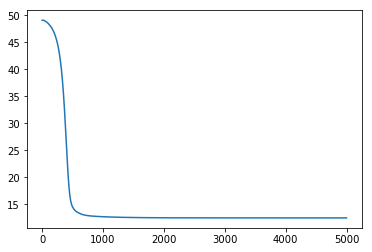

In [160]:
n_epochs = 5000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
pbar = tqdm(range(n_epochs))
_losses = []
for _ in pbar:

    bellman_trans_q = np.max(sess.run(q_pred, feed_dict={q_input:transitions}),axis=1)

    ground_truth = sess.run(q_pred, feed_dict={q_input:instances})
    ground_truth[list(range(n_samples)),actions] = rewards + discount*bellman_trans_q

    sess.run(opt_op,feed_dict={q_input:instances, q_output:ground_truth})
    _loss = sess.run(loss,feed_dict={q_input:instances, q_output:ground_truth})
    _losses.append(_loss)
    pbar.set_description('loss: {}'.format(_loss))
    
    ### TODO : Save model w/trained variables for use in target task
    
print('done')
    
plt.plot(list(range(n_epochs)),_losses)
plt.show()

In [142]:
rewards + discount*bellman_trans_q

array([-9.99610424, -9.99656868, -9.99700832, -9.99744701, -9.99785423,
       -9.99818516, -9.99851513, -9.99876595, -9.99925232, -9.99979019])

In [161]:
ground_truth

array([[ -6.41037384e-03,  -1.00096190e+00,  -6.49288995e-03,
         -5.12089999e-03,  -1.06872874e-03],
       [ -2.39553731e-02,  -1.00370896e+00,  -2.43990328e-02,
         -1.88538246e-02,  -4.12111403e-03],
       [ -4.14983034e-02,  -1.00644803e+00,  -4.22999524e-02,
         -3.25742140e-02,  -7.16453651e-03],
       [ -5.90562969e-02,  -6.13142550e-02,  -1.00918841e+00,
         -4.63403165e-02,  -1.02093313e-02],
       [ -1.01192939e+00,  -7.95559436e-02,  -7.81560466e-02,
         -6.01237267e-02,  -1.32549237e-02],
       [ -9.41834822e-02,  -1.01467049e+00,  -9.60883647e-02,
         -7.39071369e-02,  -1.63005181e-02],
       [ -1.01741147e+00,  -1.16039321e-01,  -1.14020690e-01,
         -8.76905471e-02,  -1.93461105e-02],
       [ -1.02015257e+00,  -1.34281009e-01,  -1.31953016e-01,
         -1.01473957e-01,  -2.23917030e-02],
       [ -1.46874249e-01,  -1.02289355e+00,  -1.49885342e-01,
         -1.15257382e-01,  -2.54372973e-02],
       [ -1.64437845e-01,  -1.0256346